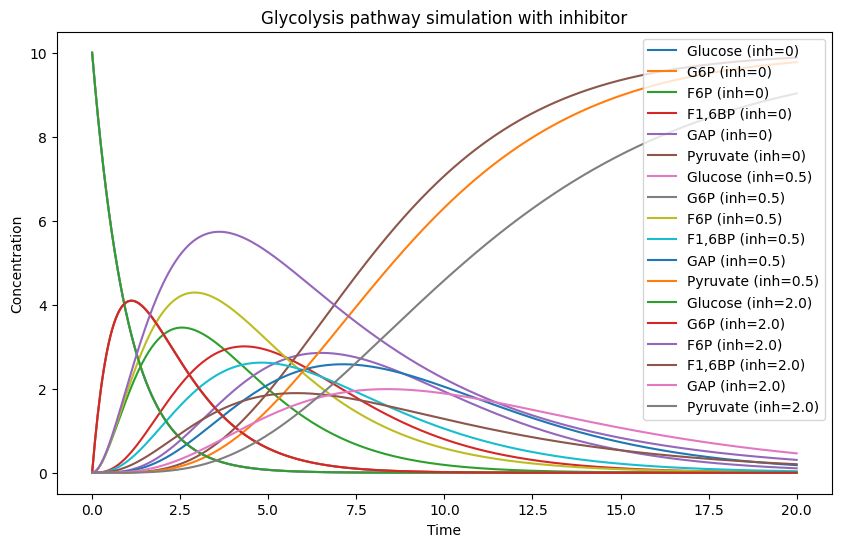

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt



# Parameters
k1, k2, k3, k4, k5 = 1.0, 0.8, 0.6, 0.5, 0.4

def inhibitor_effect(inhib_conc, IC50=1.0):
    return 1 / (1 + inhib_conc/IC50)

def glycolysis_ode(t, y, inhib_conc):
    Glc, G6P, F6P, FBP, GAP, Pyr = y
    eff_k3 = k3 * inhibitor_effect(inhib_conc)

    dGlc = -k1*Glc
    dG6P = k1*Glc - k2*G6P
    dF6P = k2*G6P - eff_k3*F6P
    dFBP = eff_k3*F6P - k4*FBP
    dGAP = k4*FBP - k5*GAP
    dPyr = k5*GAP
    return [dGlc, dG6P, dF6P, dFBP, dGAP, dPyr]

# Simulation
t_span = (0, 20)
t_eval = np.linspace(*t_span, 500)
initial = [10, 0, 0, 0, 0, 0]  # Glucose=10

metabolites = ["Glucose", "G6P", "F6P", "F1,6BP", "GAP", "Pyruvate"]

plt.figure(figsize=(10,6))
for inhib in [0, 0.5, 2.0]:
    sol = solve_ivp(glycolysis_ode, t_span, initial, t_eval=t_eval, args=(inhib,))
    for i, m in enumerate(metabolites):
        plt.plot(sol.t, sol.y[i], label=f"{m} (inh={inhib})")

plt.legend()
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.title("Glycolysis pathway simulation with inhibitor")
plt.show()
